# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = data= pd.read_csv('/content/drive/MyDrive/Python Course/stock_data.csv')

In [ ]:
%%shell
jupyter nbconvert --to html /content/USL_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/USL_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2767203 bytes to /content/USL_Project_LearnerNotebook_FullCode.html


In [ ]:
data.shape

(340, 14)

In [ ]:
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


In [ ]:
data.head()

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

In [ ]:
data.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
data[data.duplicated()].count()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
df = data.copy()

In [ ]:
df.drop("Ticker Symbol", axis=1, inplace=True)

In [ ]:
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [ ]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )

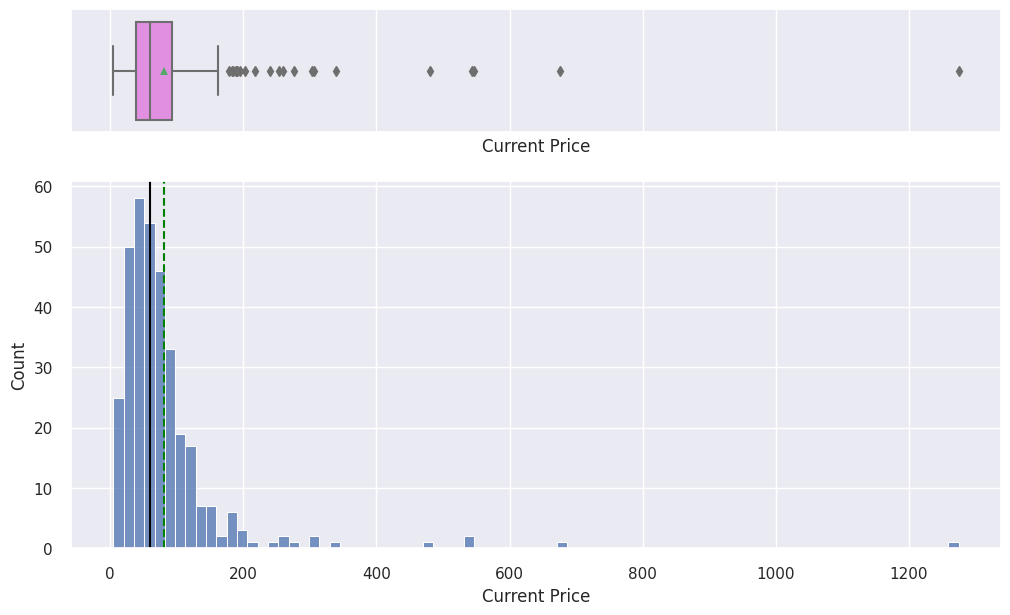

In [ ]:
histogram_boxplot(df, 'Current Price')

1. What does the distribution of stock prices look like?

The distribution of stock prices is skewed heavily to the right. The average current stock price is around 81 dollars. There is an outlier of a stock that costs 1275 dollars that needs to be looked at.


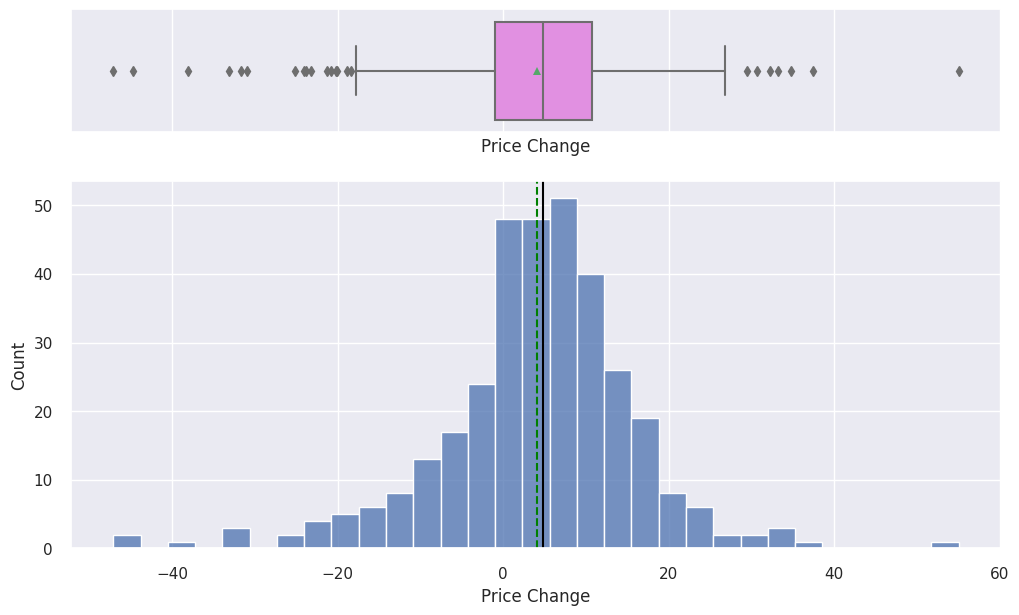

In [ ]:
histogram_boxplot(df, 'Price Change')

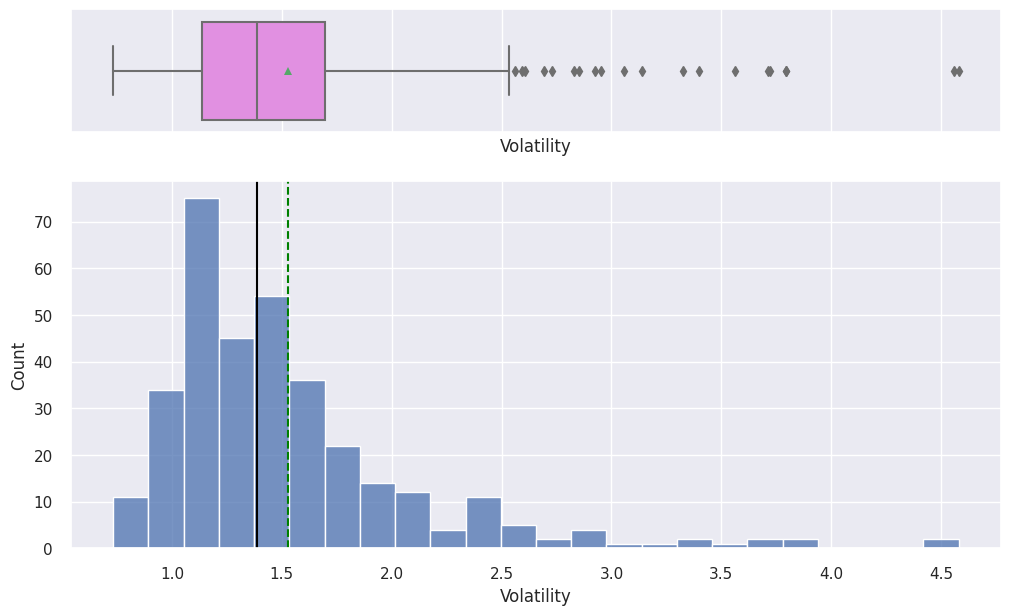

In [ ]:
histogram_boxplot(df, 'Volatility')

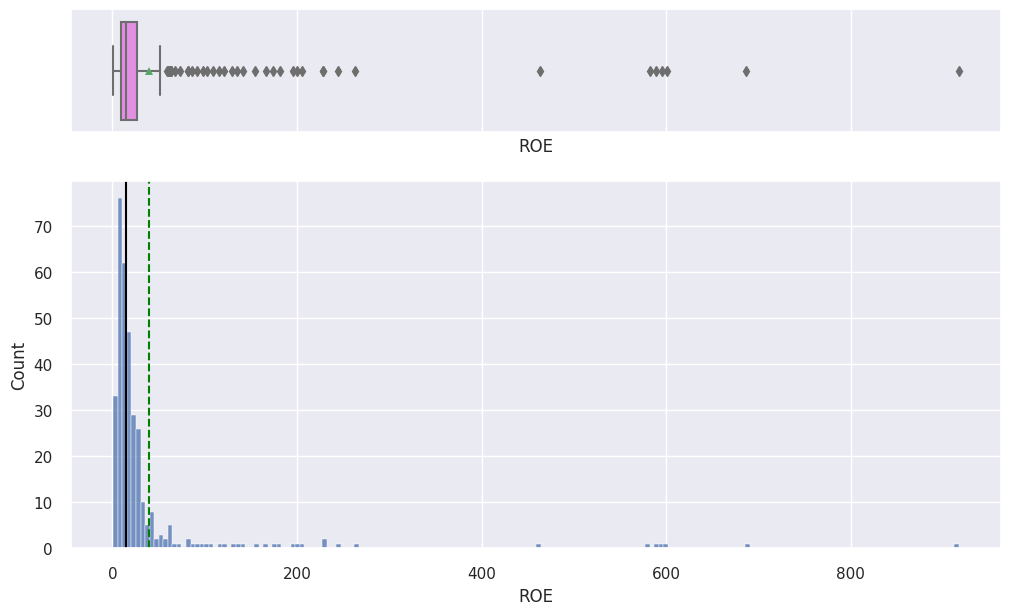

In [ ]:
histogram_boxplot(df, 'ROE')

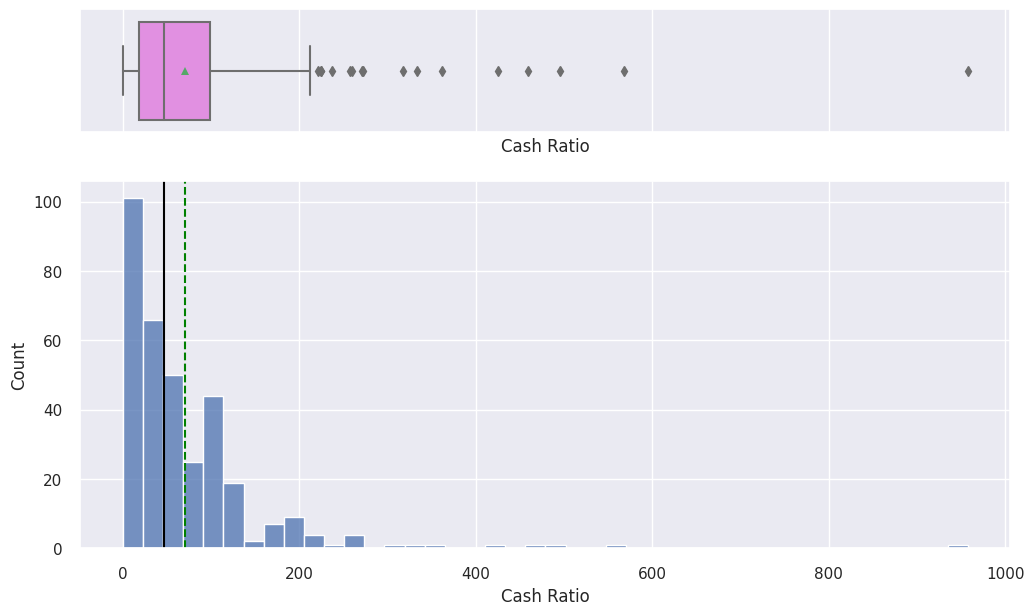

In [ ]:
histogram_boxplot(df, 'Cash Ratio')

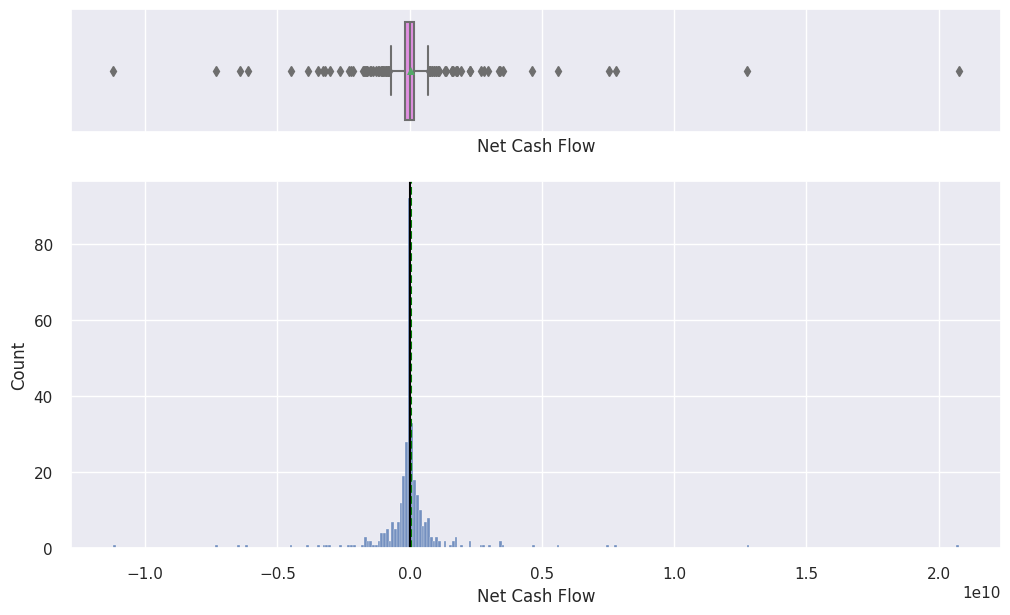

In [ ]:
histogram_boxplot(df, 'Net Cash Flow')

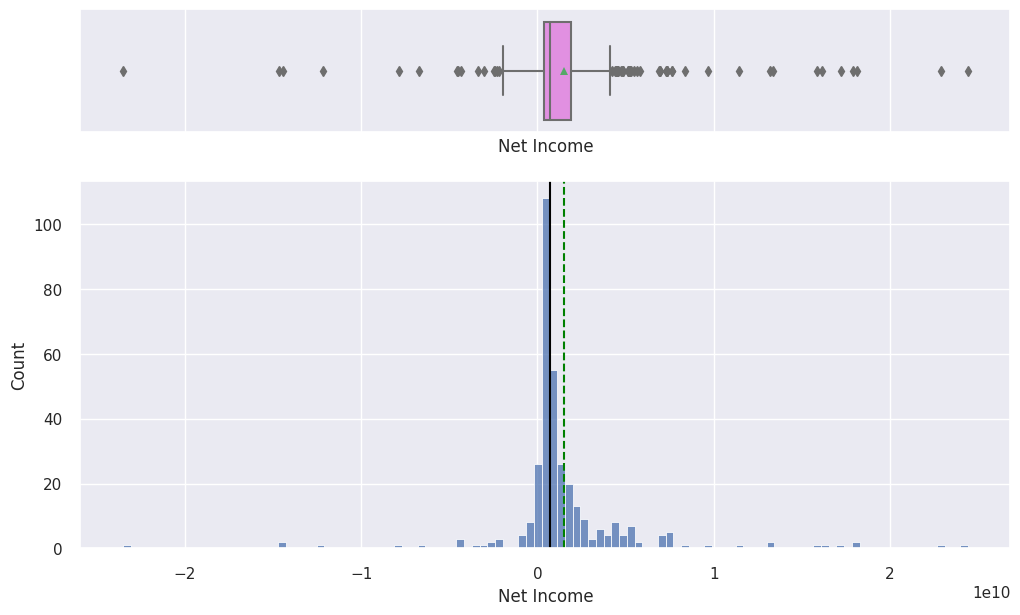

In [ ]:
histogram_boxplot(df, 'Net Income')

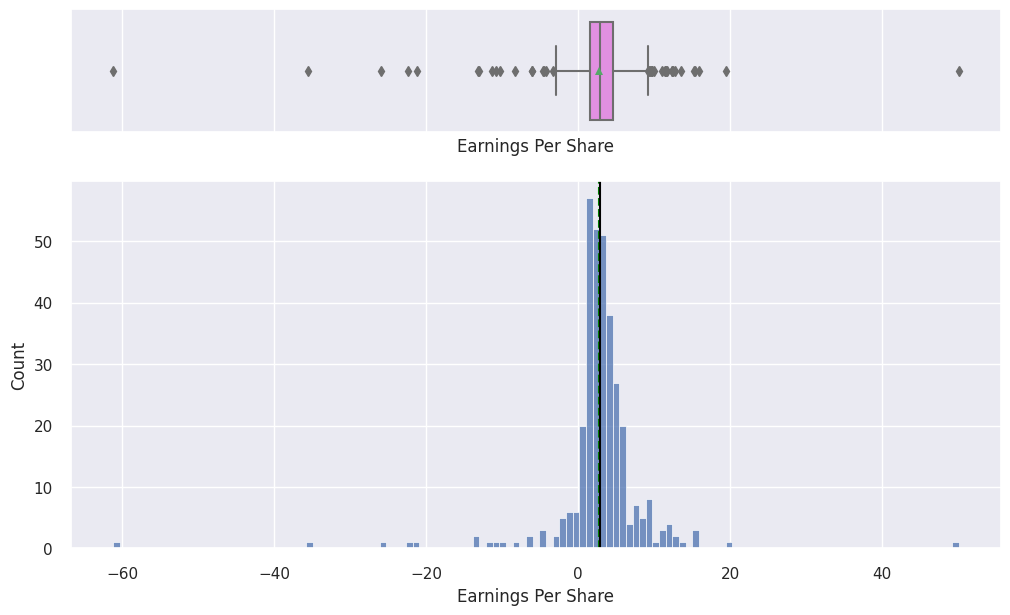

In [ ]:
histogram_boxplot(df, 'Earnings Per Share')

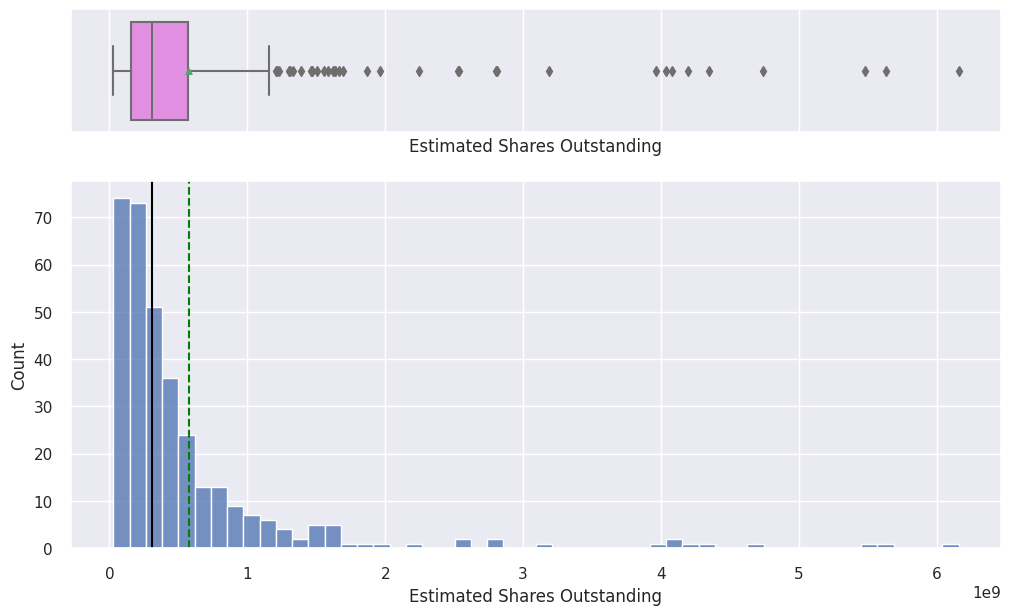

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

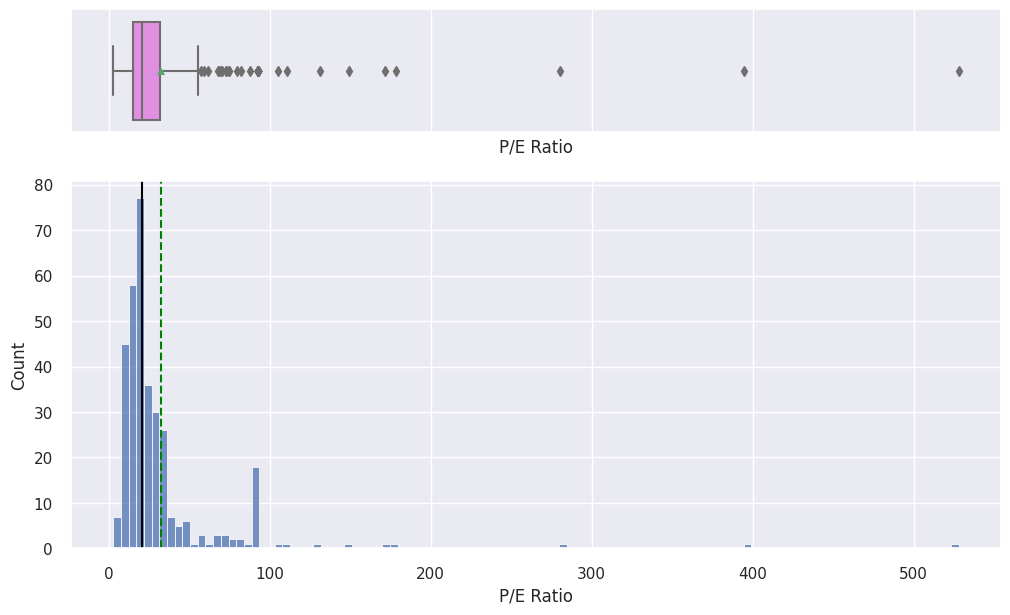

In [ ]:
histogram_boxplot(df, 'P/E Ratio')

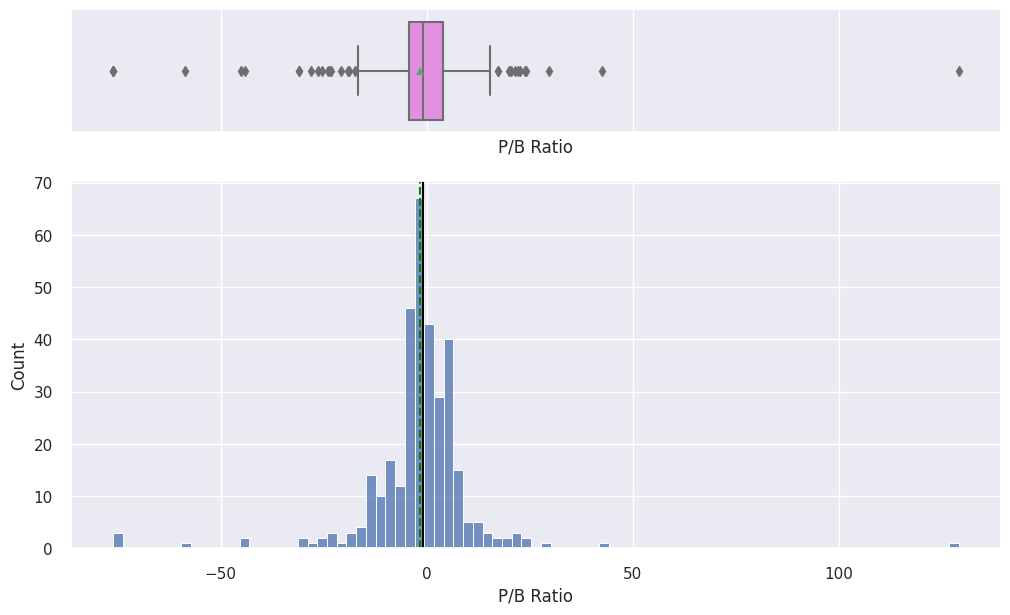

In [ ]:
histogram_boxplot(df, 'P/B Ratio')

In [ ]:
def labeled_barplot(df, feature, perc=False, n=None):
    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
plt.show()

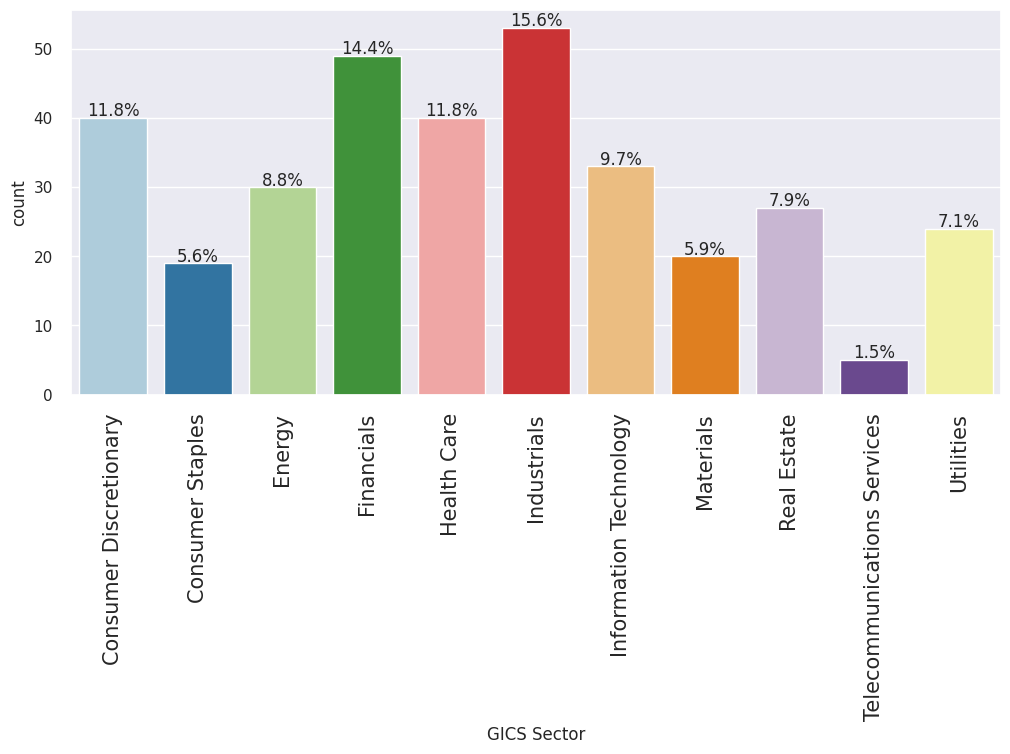

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

In [ ]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

2. The stocks of which economic sector have seen the maximum price increase on average?

The Health Care sector has seen the maximum price increase on average at around 9.6.

In [ ]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

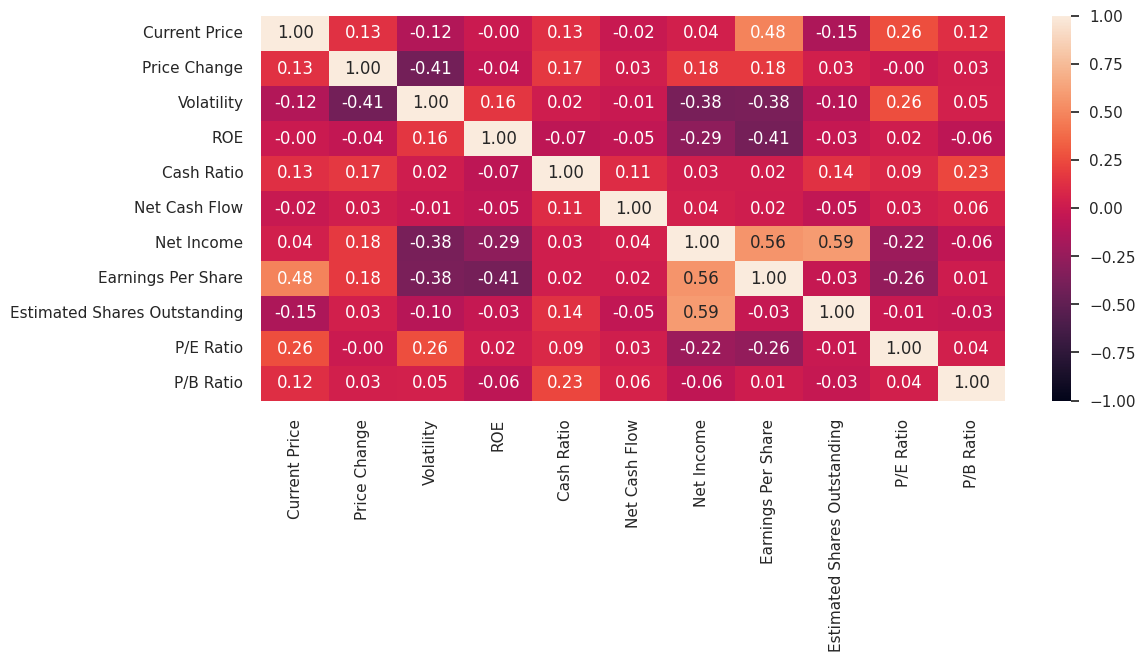

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    df[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='rocket'
)
plt.show()

3. How are the different variables correlated with each other?

*   Current price and Earnings Per share are moderately positively correlated, meaning the higher the current price the higher the earnings per share are.
*   Price change and Volatility are moderatly negatively correlated, meaning the average worth of the stocks are down.
*   ROE and earnings per share are moderatly negatively correlated, meaning there is debt to be paid off in terms of income of shareholders and their earnings per share.
*   Cash ratio and P/B ratio are slightly positively correlated, meaning they have enough money for their liabilities.
*   Net income and estimated shares outstanding are highly positively correlated, meaning the company is doing really well and is making money off their shareholders.







In [ ]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

IT and Telecommunication services both have a high average cash ratio. They are both newer type of economic sectors which are not as heavily regulated meaning they can have more control over their cash ratio.
Utilities are have the lowest cash ratio because they are regukated and stay constant since so many people rely on this month to month.

In [ ]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

Energy has the highest P/E ratio because investors know that it is a reliable share to buy since energy is used no matter what. Telecommunications services have the lowest P/E ratio because it is outdated technology.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

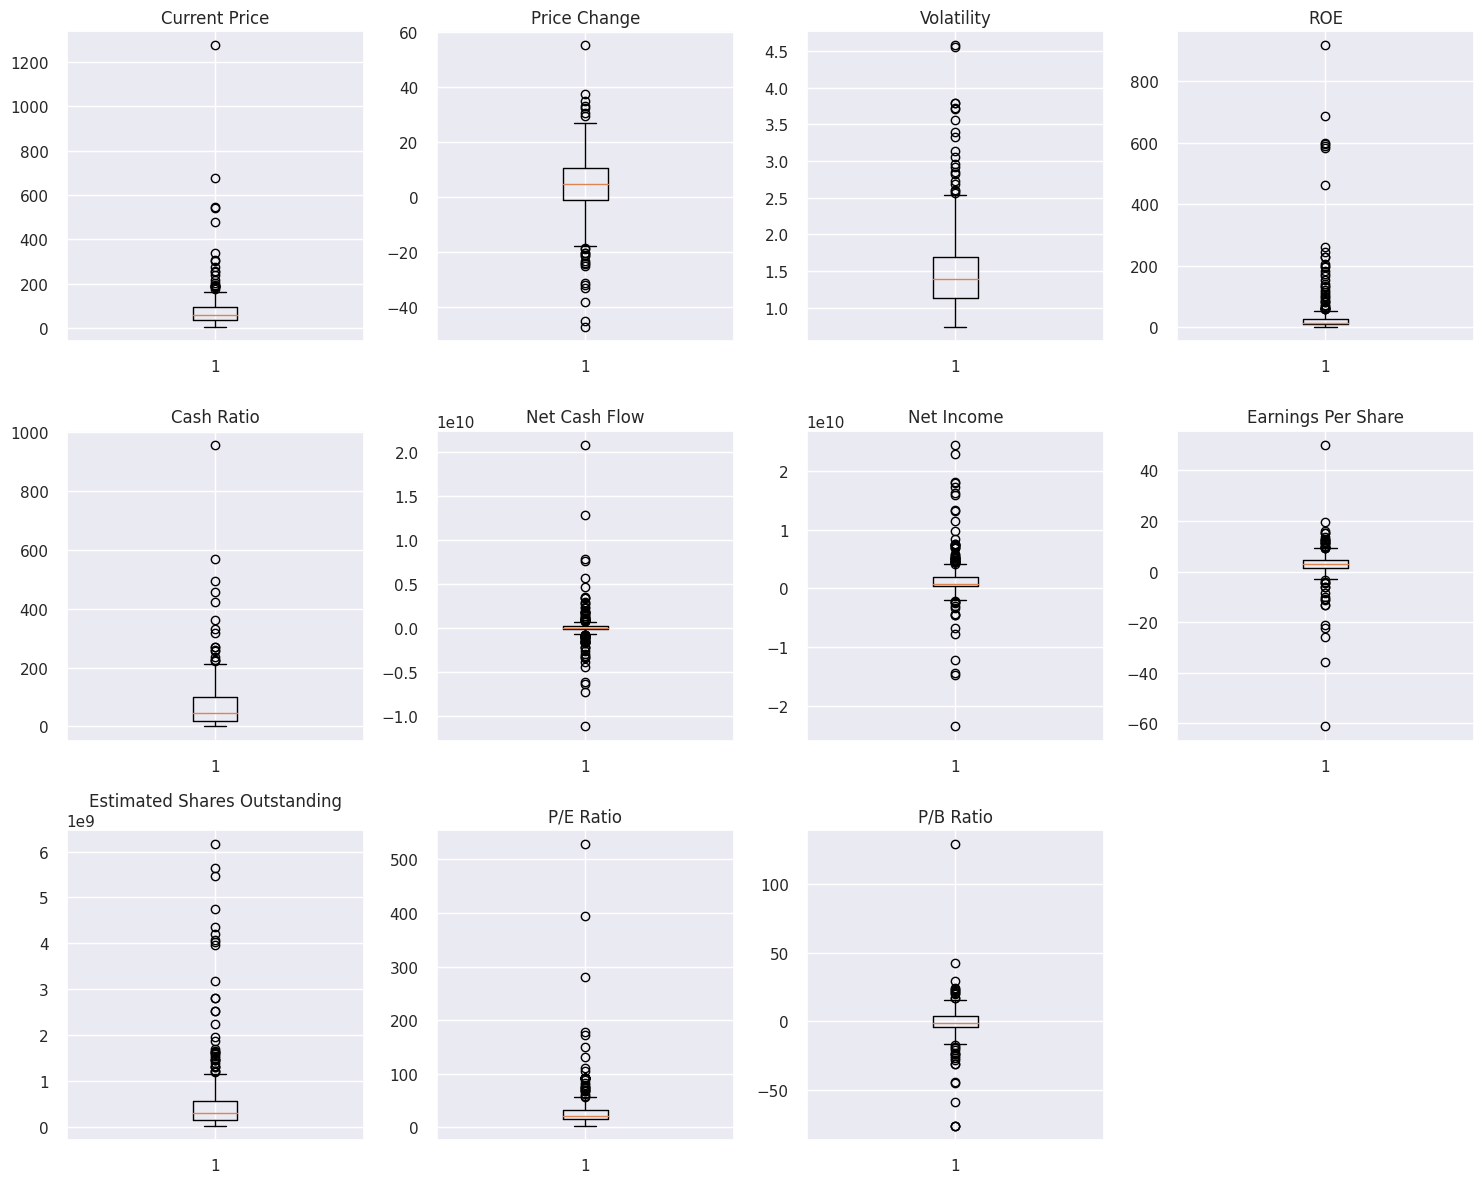

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.1822426161442072
Number of Clusters: 5 	Average Distortion: 2.139205926363256
Number of Clusters: 6 	Average Distortion: 2.0737104927328227
Number of Clusters: 7 	Average Distortion: 2.02273631956027
Number of Clusters: 8 	Average Distortion: 1.9899408536298782
Number of Clusters: 9 	Average Distortion: 1.9233883300130414
Number of Clusters: 10 	Average Distortion: 1.8583081140539814
Number of Clusters: 11 	Average Distortion: 1.8150943440896545
Number of Clusters: 12 	Average Distortion: 1.7822859428222277
Number of Clusters: 13 	Average Distortion: 1.7128936852094765
Number of Clusters: 14 	Average Distortion: 1.6800676340914302


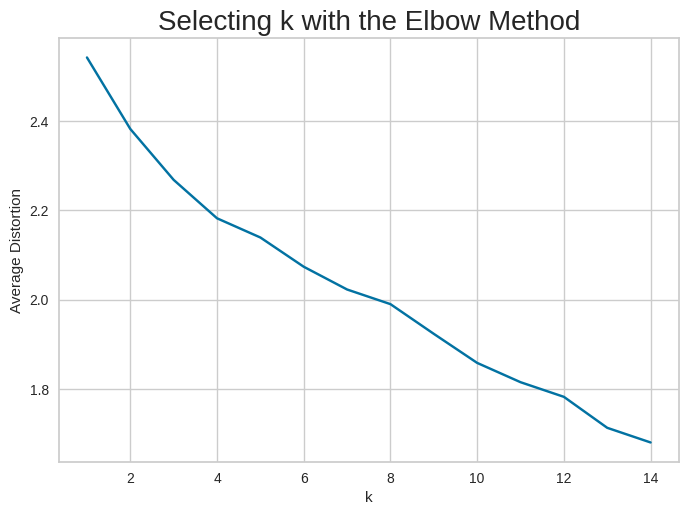

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

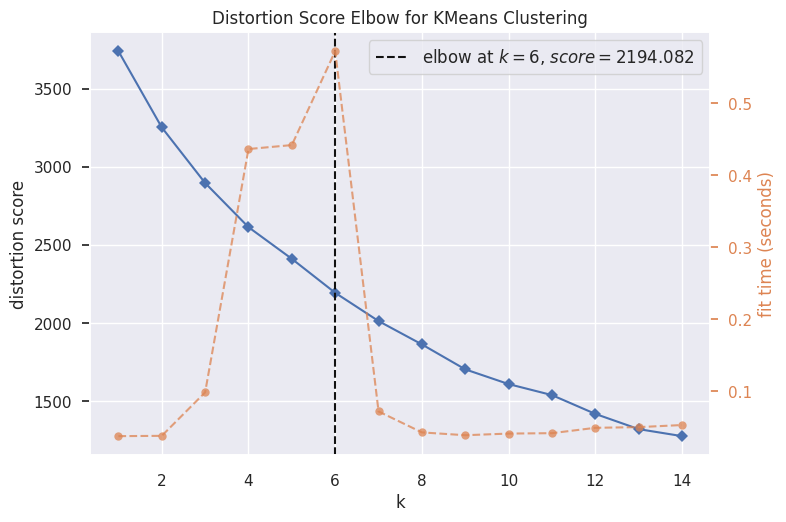

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

For n_clusters = 2, the silhouette score is 0.44416043768697844)
For n_clusters = 3, the silhouette score is 0.47065481960396205)
For n_clusters = 4, the silhouette score is 0.466157359052443)
For n_clusters = 5, the silhouette score is 0.4408519137841764)
For n_clusters = 6, the silhouette score is 0.4101564846288873)
For n_clusters = 7, the silhouette score is 0.406093495880513)
For n_clusters = 8, the silhouette score is 0.41052062735465394)
For n_clusters = 9, the silhouette score is 0.3840652598219569)
For n_clusters = 10, the silhouette score is 0.13701728045201417)
For n_clusters = 11, the silhouette score is 0.14306633173857772)
For n_clusters = 12, the silhouette score is 0.20572843225891727)
For n_clusters = 13, the silhouette score is 0.23840527700001354)
For n_clusters = 14, the silhouette score is 0.12167519382746013)


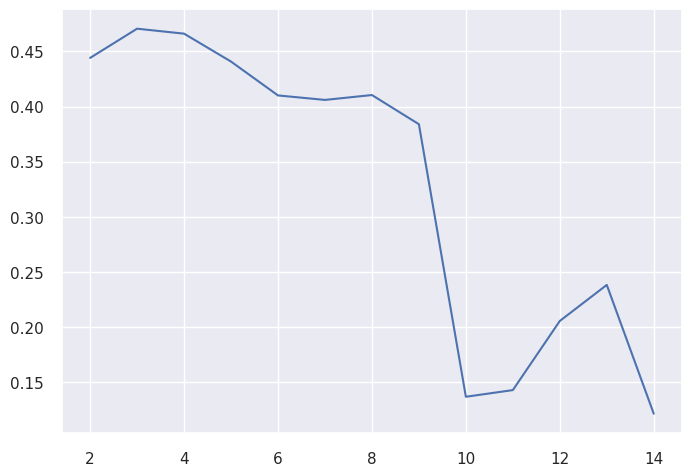

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

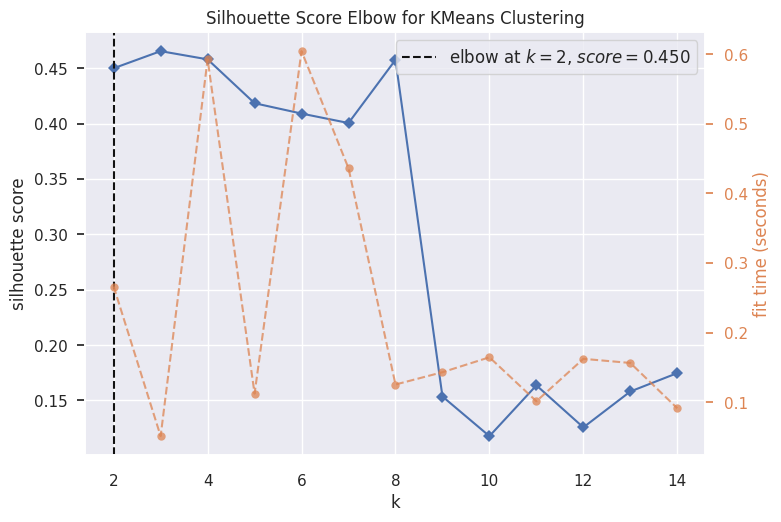

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

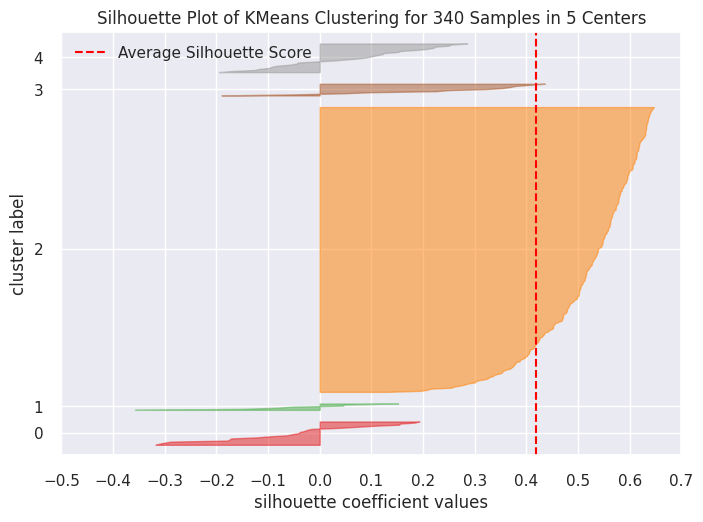

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans( 5, random_state=42))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(k_means_df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
df1 = df.copy()
k_means_df["KM_clusters"] = kmeans.labels_
df1["KM_clusters"] = kmeans.labels_

In [ ]:
km_cluster_profile = df1.groupby("KM_clusters").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_clusters")["Current Price"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_clusters,,,,,,,,,,,,
0,50.477272,5.588148,1.141171,31.545455,64.181818,-2581727272.727273,14675545454.545454,4.490909,4012176129.000000,14.010093,-5.356393,11
1,81.418719,10.536341,1.578634,17.000000,367.538462,3857062692.307693,3129067846.153846,2.197692,1334755181.584615,65.639418,6.235848,13
2,73.769121,5.466467,1.392827,34.632143,55.710714,4183132.142857,1443269353.571429,3.629625,430217149.035393,24.132318,-3.203999,280
3,38.808966,-13.680395,2.938240,106.034483,55.551724,-189825655.172414,-3578126517.241379,-8.657586,463121182.880690,85.946813,1.888901,29
4,585.527134,7.752090,1.508020,17.571429,159.142857,210520428.571429,804590428.571429,14.410000,116080574.760000,118.763084,33.713020,7


In [ ]:
for cl in df1["KM_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_clusters"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 280
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Analog Devices, Inc.', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Bank of America Corp', 'Celgene Corp.', ..., 'Intel Corp.', 'McDonald's Corp.', 'Monster Beverage', 'Waters Corporation', 'Yahoo Inc.']
Length: 13
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 4, the following companies are present:
['Alliance Data Systems', 'Amazon.com Inc', 'Chipotle Mexican 

In [ ]:
df1.groupby(["KM_clusters", "GICS Sector"])['Security'].count()

KM_clusters  GICS Sector                
0            Consumer Discretionary          2
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Industrials                     0
             Information Technology          0
             Materials                       0
             Real Estate                     0
             Telecommunications Services     2
             Utilities                       0
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     4
             Industrials                     0
             Information Technology          4
             Materials                       0
             Real Estate                     0
             Teleco

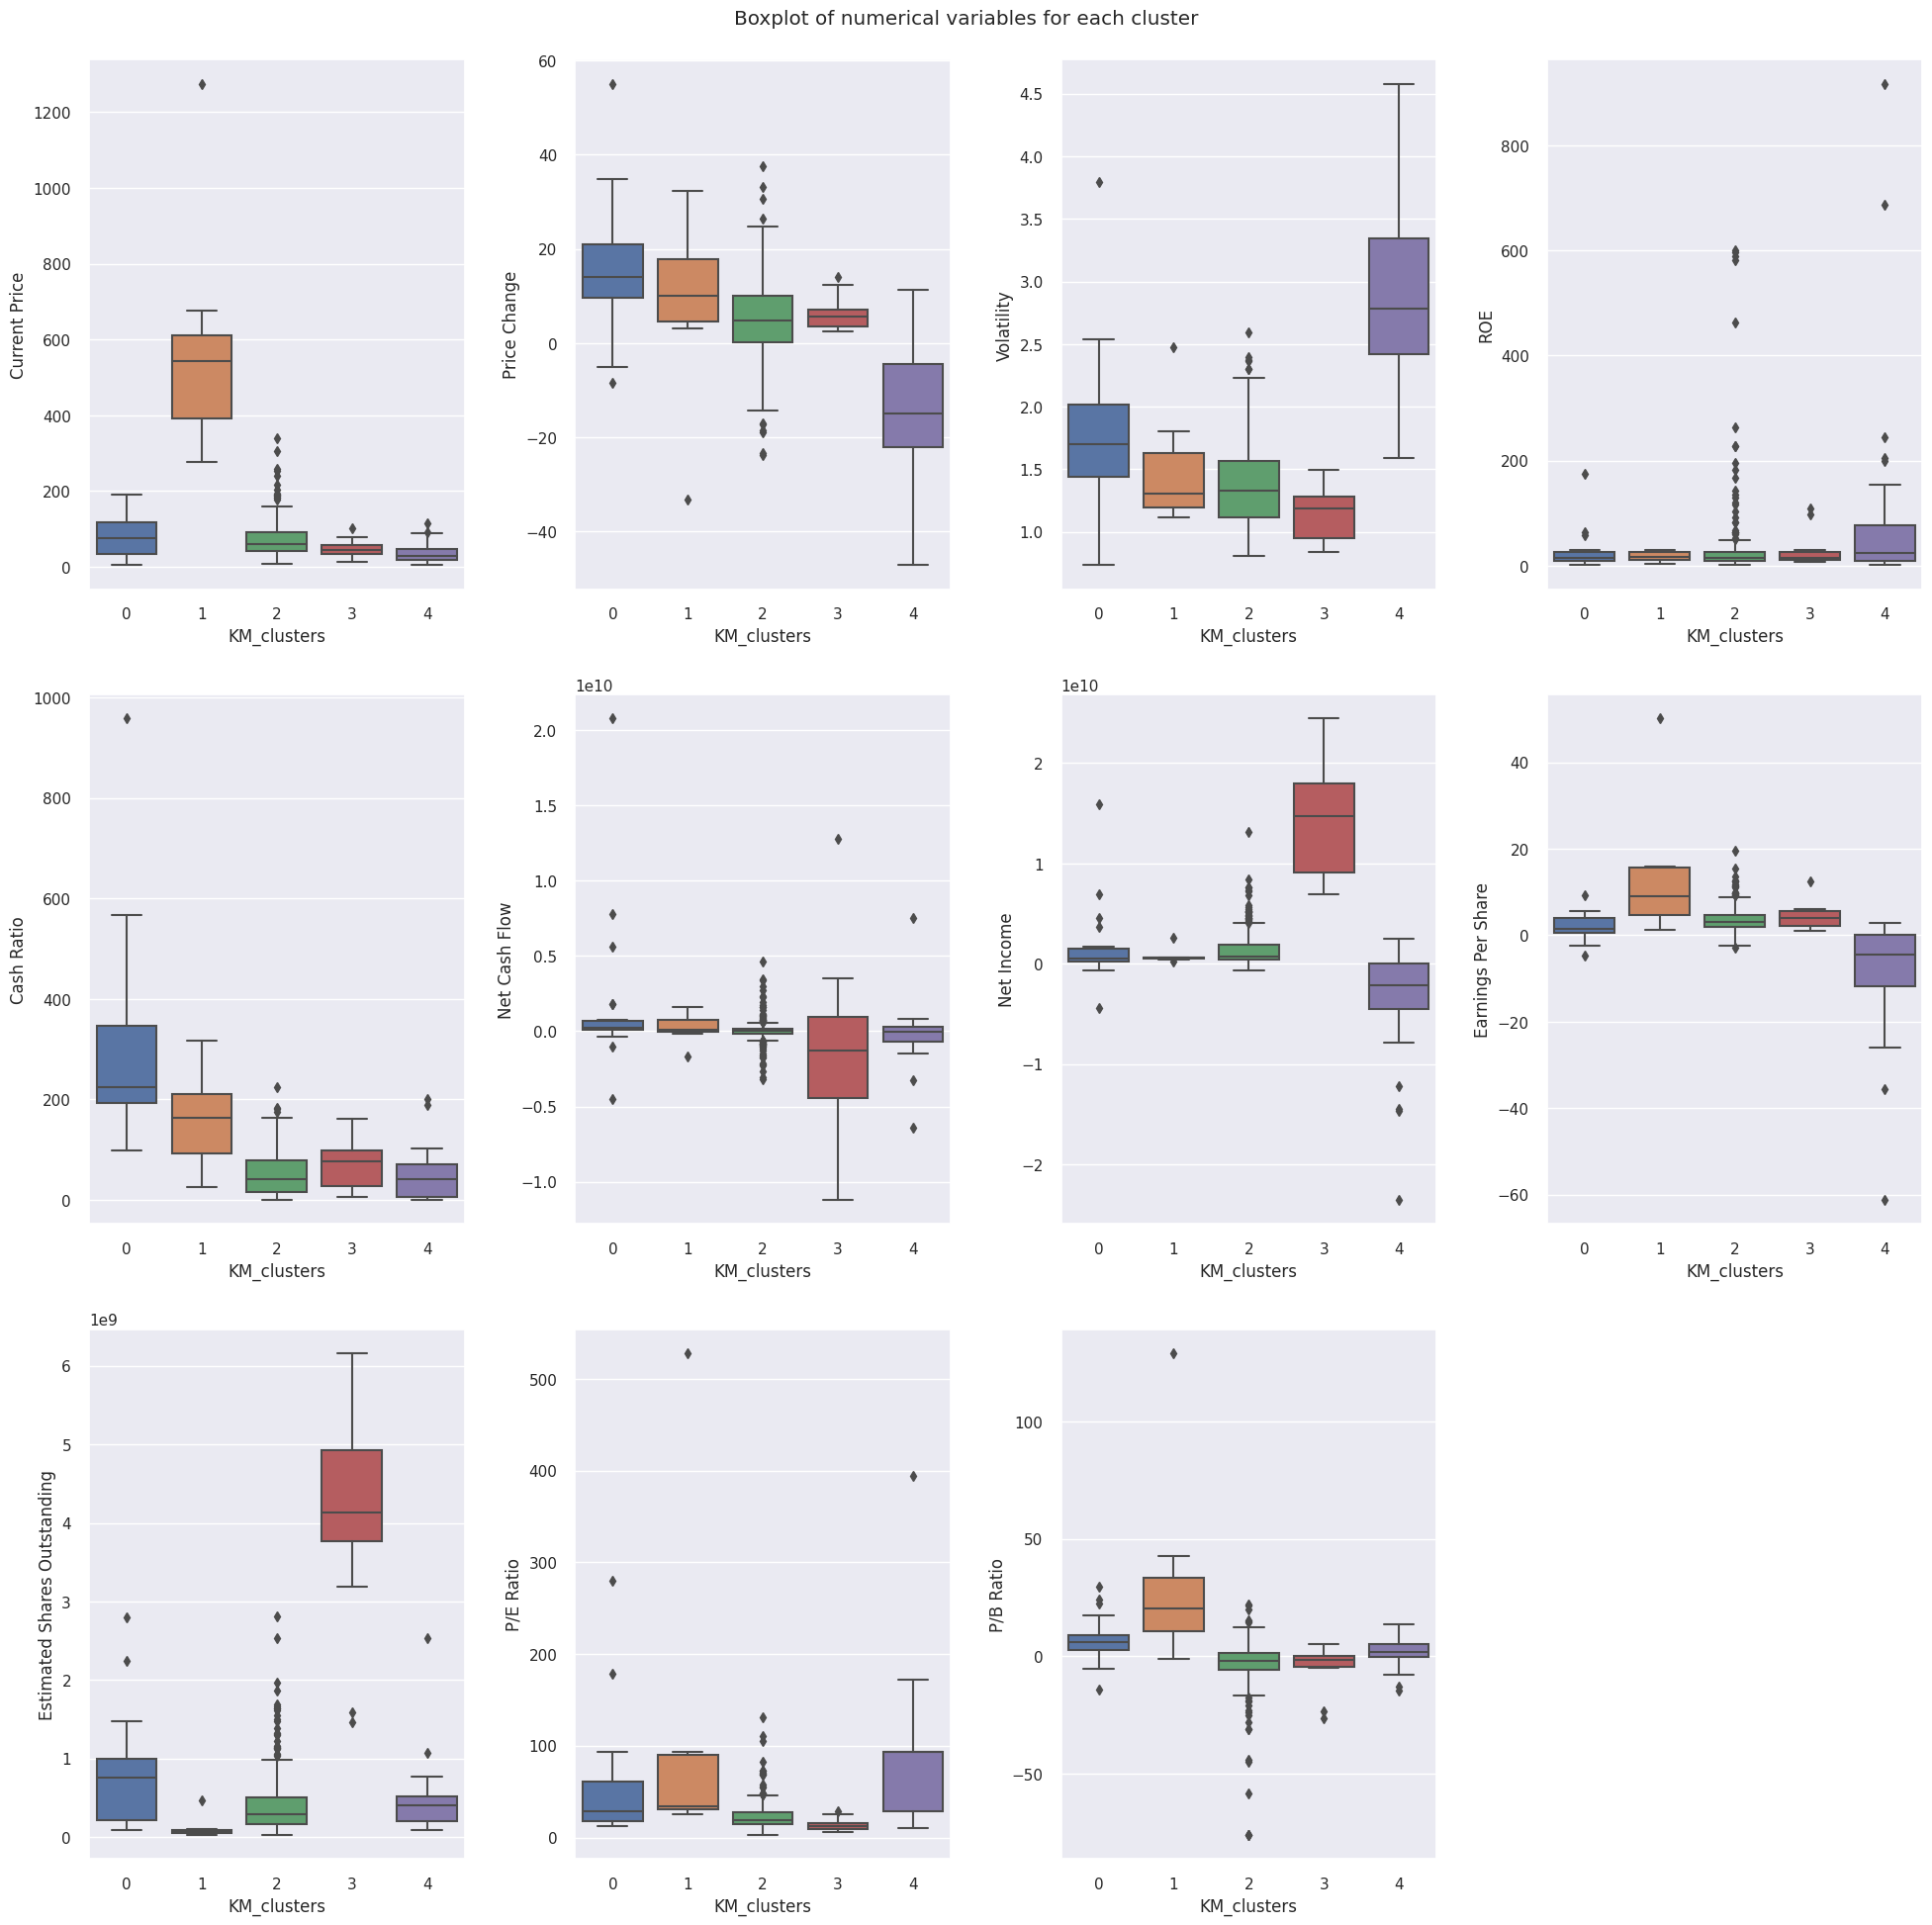

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_clusters", y=variable)

plt.tight_layout(pad=2.0)



**Cluster 0**
*   44 stocks mostly in Energy, Health care, and Financials
*   Moderate volatility, low P/B ratio, high current price

**Cluster 1**
*   109 stocks mostly in Financials and Health care
*   Low volatility, high cash ratio, moderate current price

**Cluster 2**
*  41 stocks mostly in Consumer discretionary and Industrials
*  High volatility, low net income, high P/E ratio

**Cluster 3**
*   57 stocks mostly in IT, industrials, and Health care
*   Moderate volatility, low price change, high estimated shares outstanding

**Cluster 4**
*   91 stocks mostly in Utilities, IT, and real estate
*   Low volatility, low cash ratio, moderate estimated shares outstanding

















## Hierarchical Clustering

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

In [ ]:
linkage_methods = ["single", "complete", "average", "weighted"]

In [ ]:
high_cophenet_corr = 0
high_dm_lm = [0, 0]

In [ ]:
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [ ]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

In [ ]:
for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


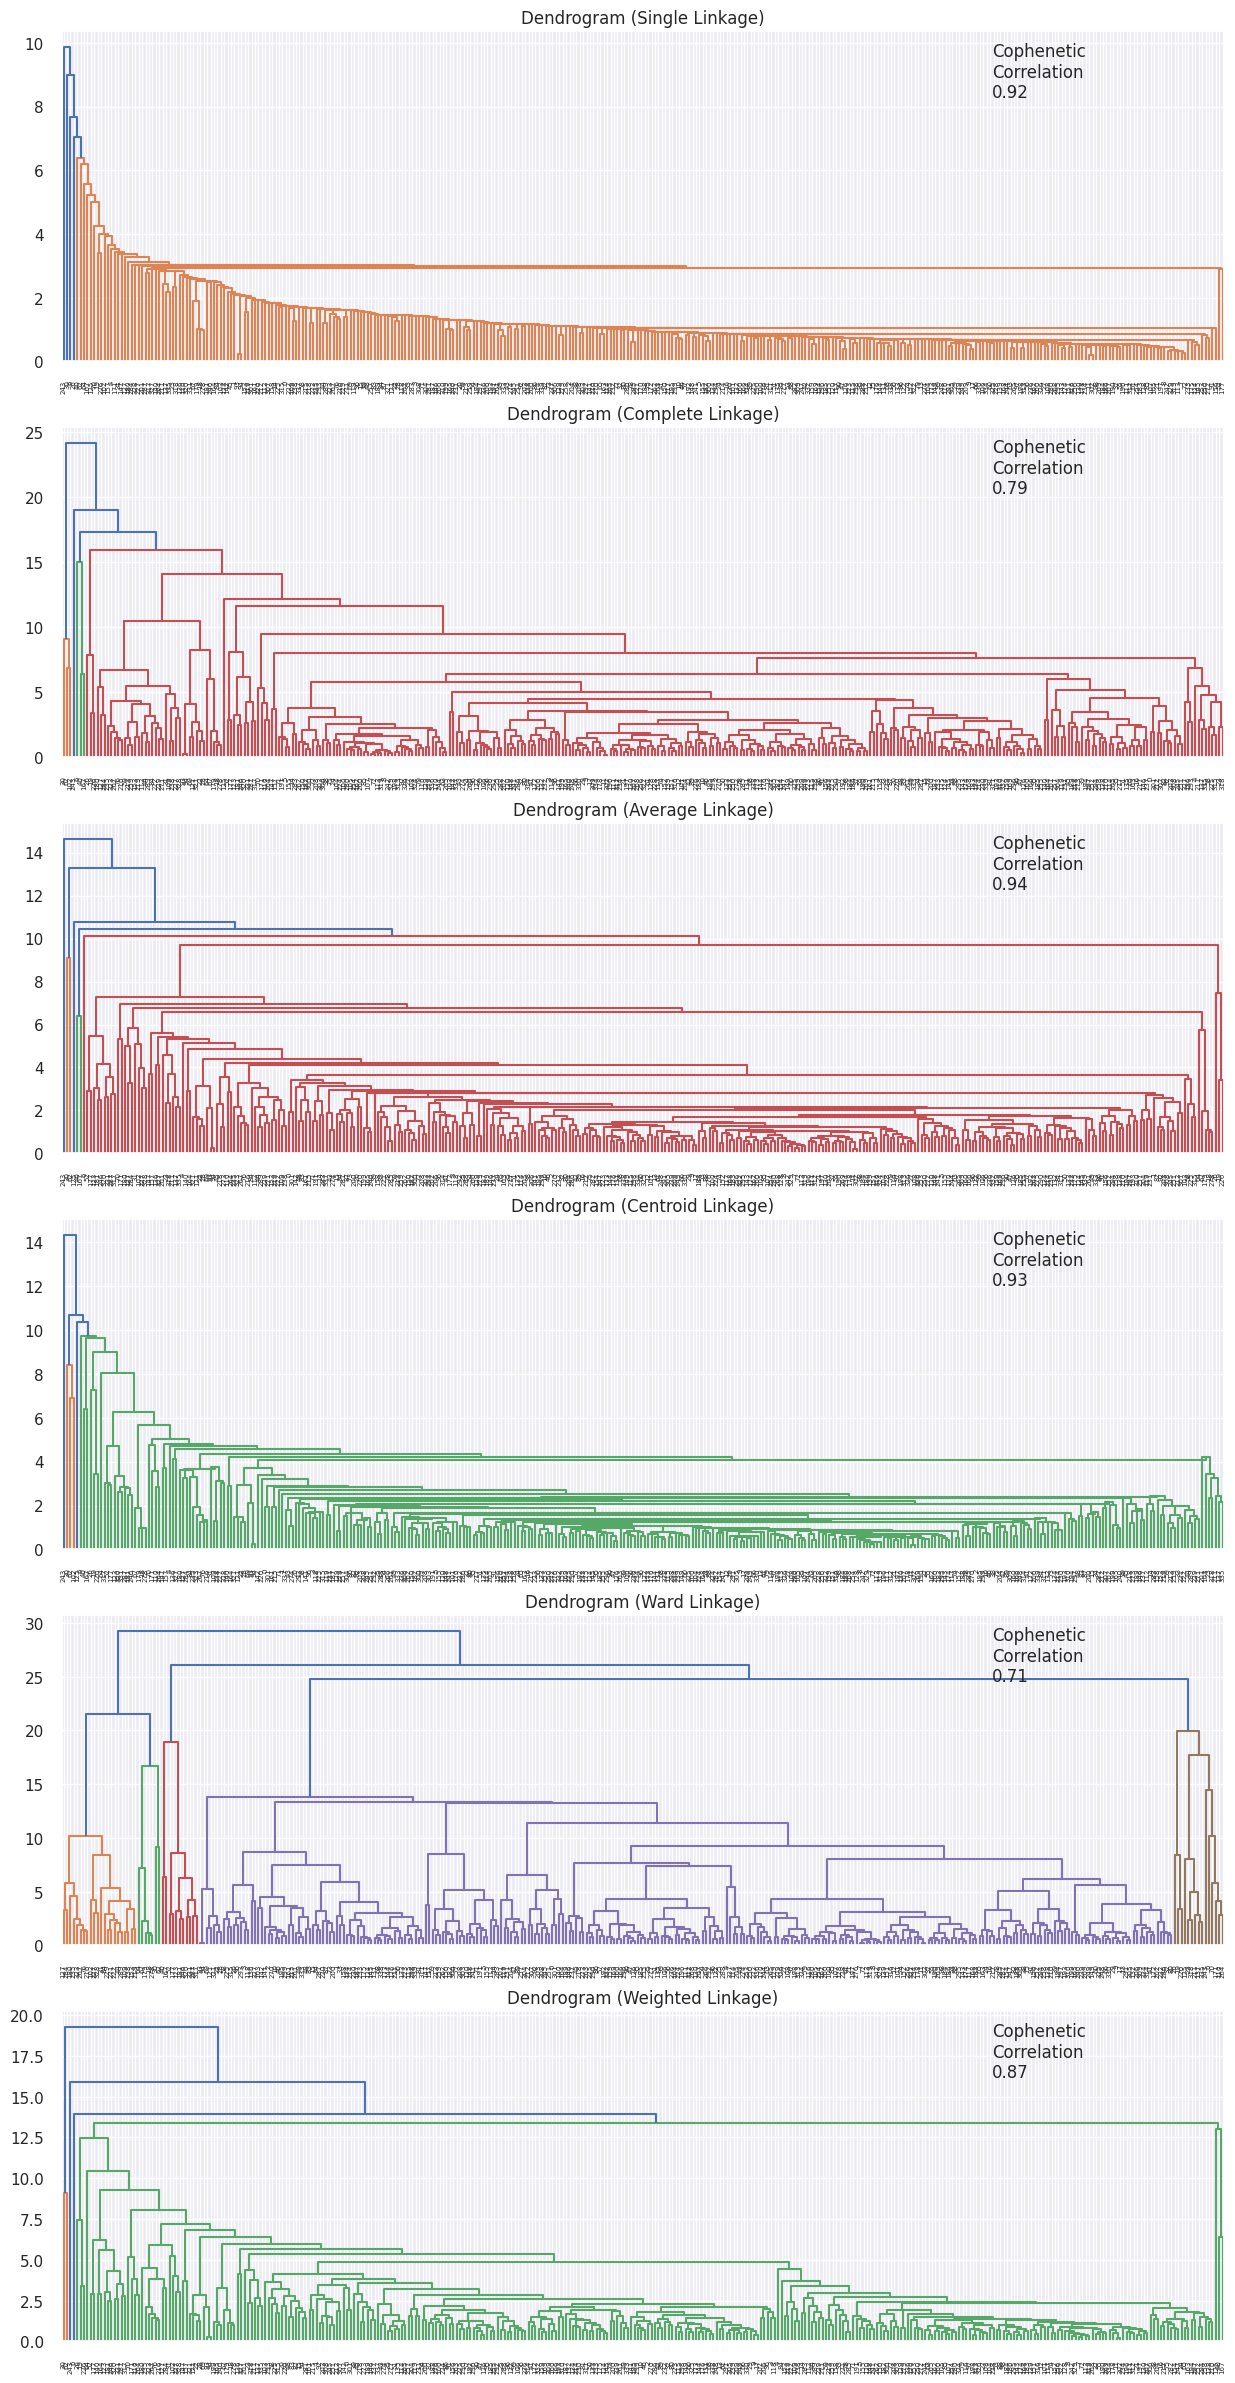

In [ ]:

linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
df2 = df.copy()
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


In [ ]:
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', ..., 'Xylem Inc.', 'Yum! Brands Inc', 'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis']
Length: 275
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 0, the following companies are present:
['Adobe Systems Inc', 'Alliance Data Systems', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'Amgen Inc', ..., 'TripAdvisor', 'Vertex Pharmaceuticals Inc', 'Waters Corporation', 'Wynn Resorts Ltd', 'Yahoo Inc.']
Length: 27
Categories (340, object): ['3M Company', 'AFLAC Inc', 'AMETEK Inc', 'AT&T Inc', ...,
                           'Zimmer Biomet Holdings', 'Zions Bancorp', 'Zoetis', 'eBay Inc.']

In cluster 1, the following companies are present:
['Allegion', 'Apache Corporation', 'Chesape

In [ ]:
for k in range(0,df2['HC_segments'].nunique()):
    print('The number of stocks in each GICS Sector for Cluster '+str(k)+' are:')
    print(df2[df2['HC_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks in each GICS Sector for Cluster 0 are:
Information Technology         9
Health Care                    8
Consumer Discretionary         5
Consumer Staples               1
Financials                     1
Materials                      1
Real Estate                    1
Telecommunications Services    1
Energy                         0
Industrials                    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks in each GICS Sector for Cluster 1 are:
Consumer Staples               2
Energy                         2
Consumer Discretionary         1
Financials                     1
Industrials                    1
Health Care                    0
Information Technology         0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks in each GICS Sector for Cluster 2 are:
Financials            

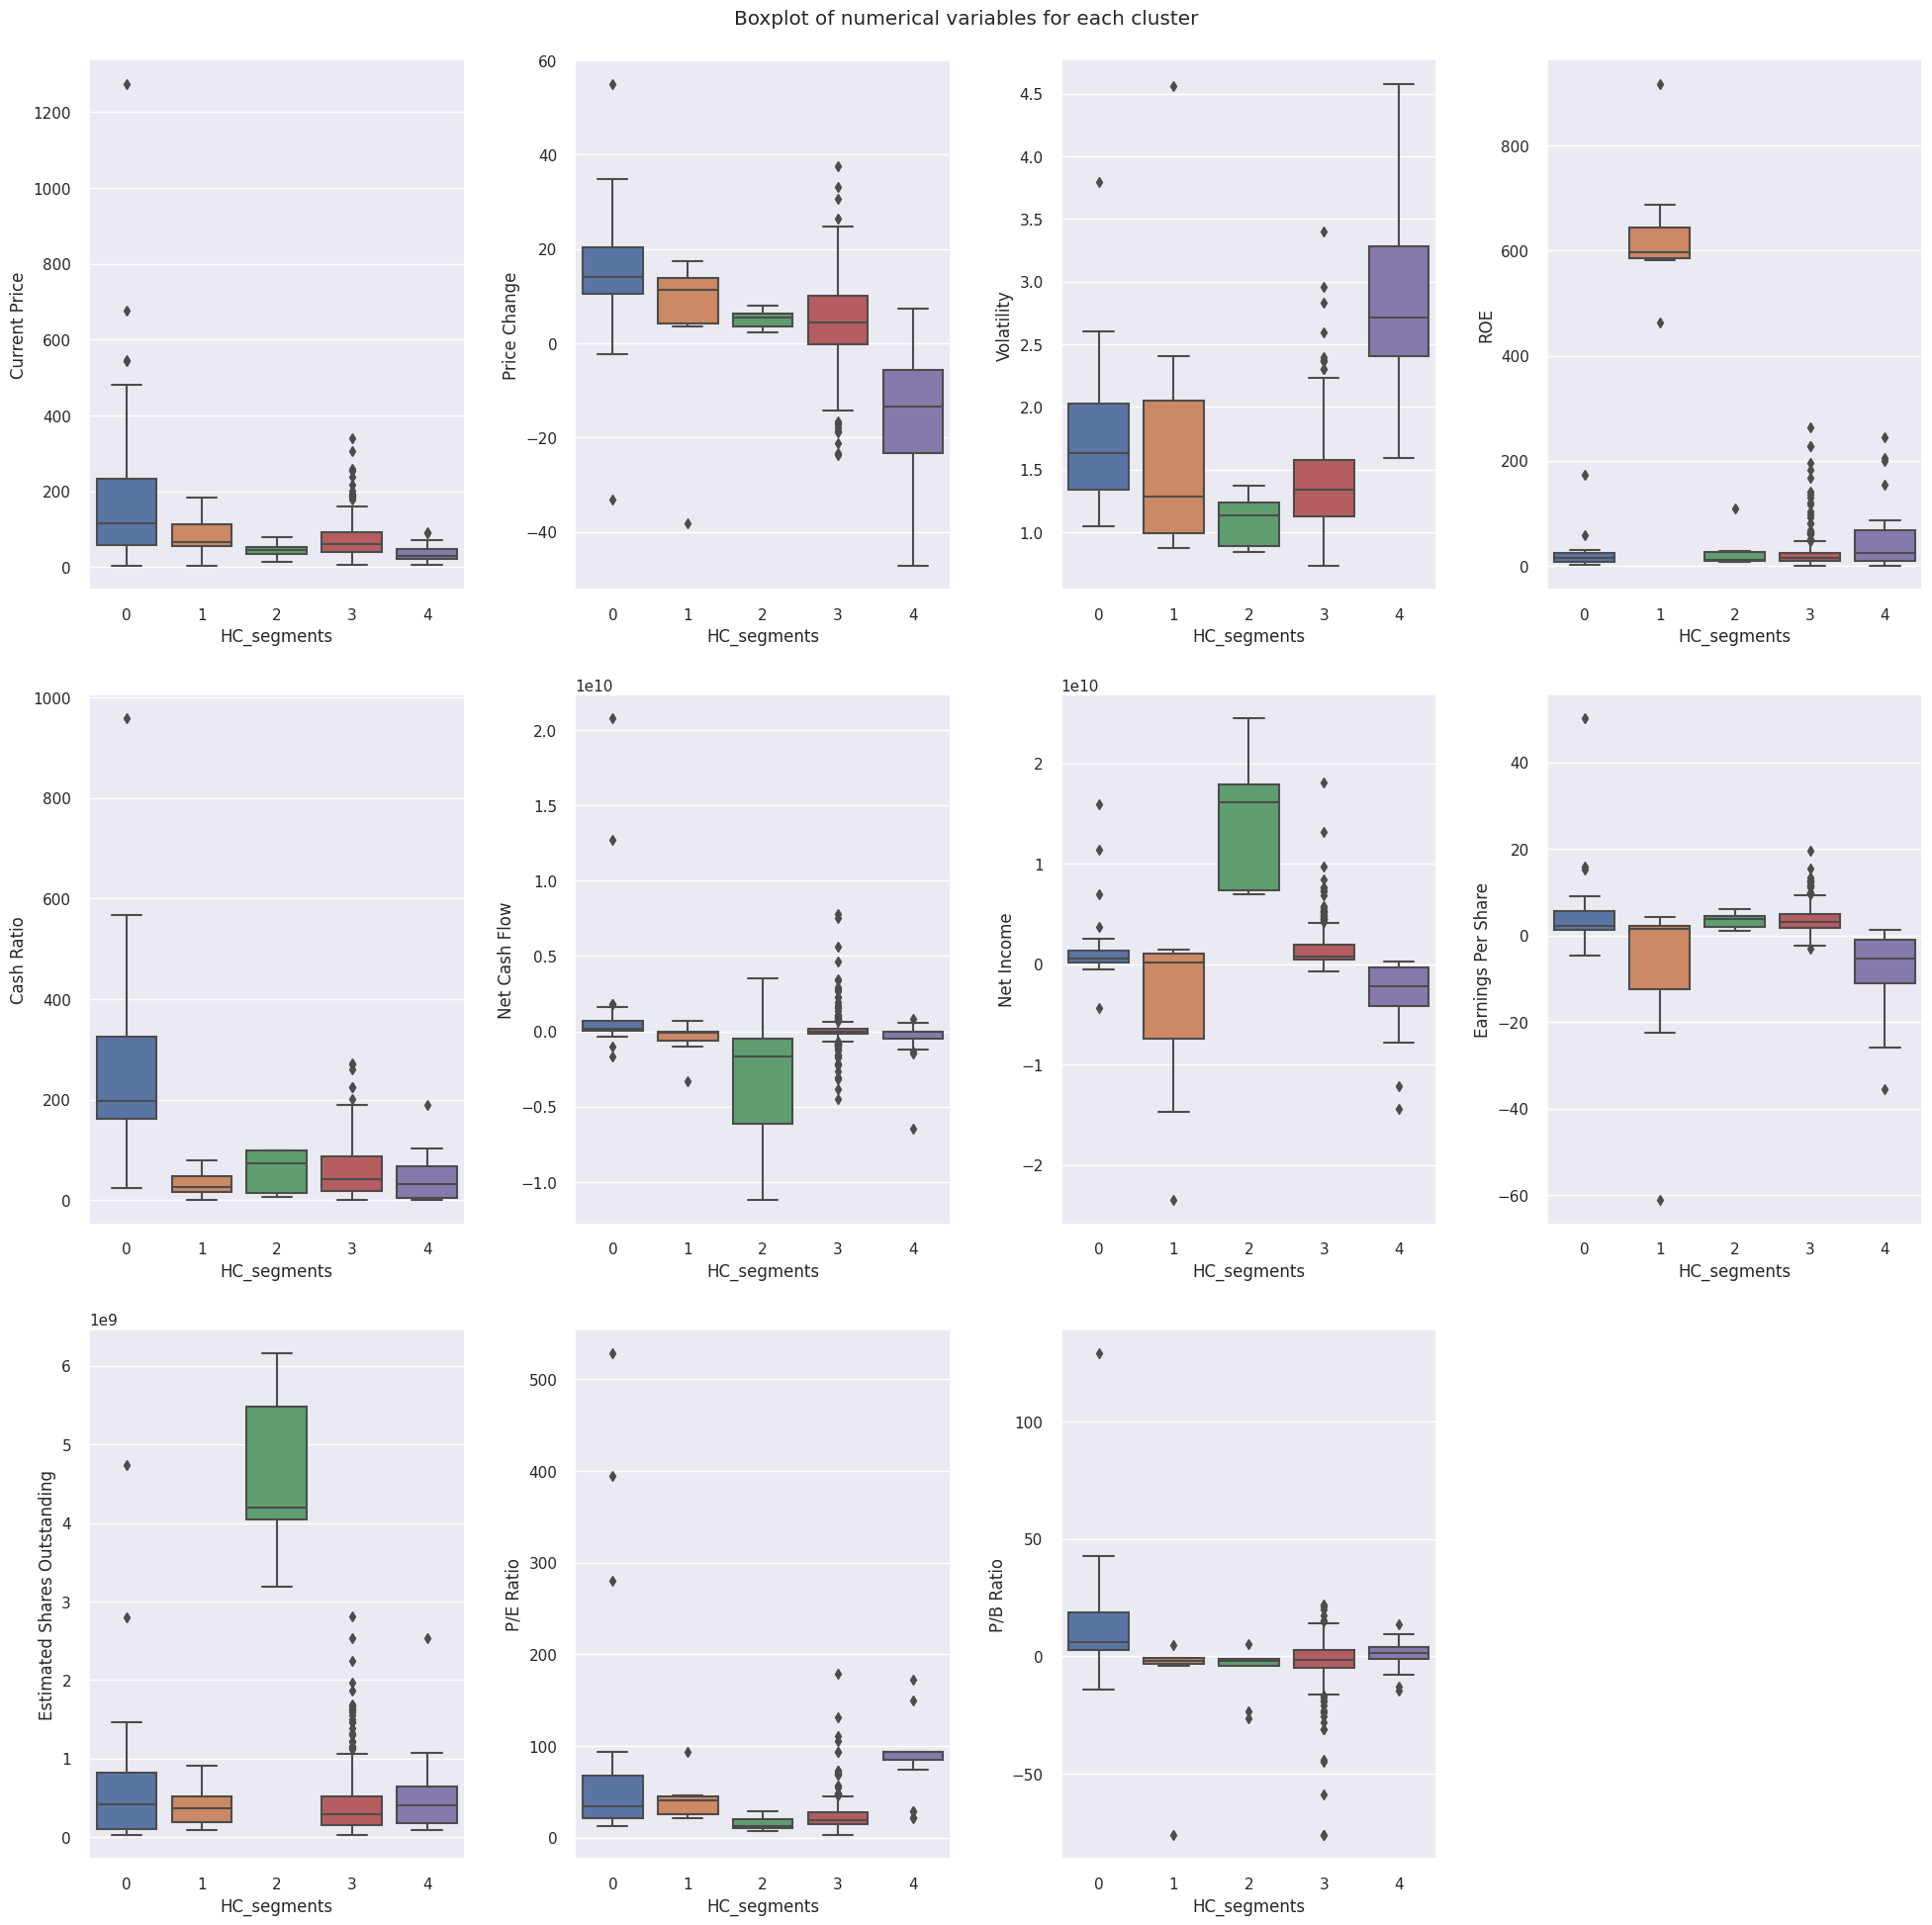

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Cluster 0**
*   27 stocks mostly in IT and healthcare
*   Stocks have highest price, most highest cash ratios, great P/B ratios, significant amount of outliers in price to equity ratio

**Cluster 1**
*   7 stocks mostly in consumer staples and energy
*   Almost all negative earnings per share, has lowest net incomes, highest returns on equity

**Cluster 2**
*   9 stocks mostly in Financials and Telecommunications Services
*   Significantly has highest net incomes, companies in this cluster have highest inflows and outflows of cash, significantly has highest number of shares outstanding

**Cluster 3**
*   275 stocks mostly in Industrials, Financials, and Consumer Discretionary
*   Has the most outliers out of every cluster. Most of the outliers in P/B ratio. Some of the outliers in cash outflows and inflows. Most of the outliers in price increases of cash.

**Cluster 4**
*   22 stocks mostly all in Energy
*   Highly negative price change and net income, highly positive Volatility and has the most









## K-means vs Hierarchical Clustering

**Which clustering technique took less time for execution?**
*   The Kmeans technique and the Agglomerative Clustering technique took the least time and fit the dataset within a second.  

**Which clustering technique gave you more distinct clusters, or are they the same?**
*   Kmeans clustering technique gave more distinct clusters, with greater number jumps.

**How many observations are there in the similar clusters of both algorithms?**
*   There are 5 clusters provided for both algorithms with enough observations in each to differentiate which type of stock is best fit for each model.

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**
*   5




## Actionable Insights and Recommendations

*   There is a need to recommend a cluster to use as a stock portfolio for clients basedd on their financial interests, risk decisions, and how they invest so we can provide a cluster to best fit their individual goals.
*   Health care, Financials, and IT all have favorable ratios and would be the least risk for amount of money the client is able to make.
*   Cluster 3 of the hierarchical algorthim has the most risk but could be the most favorable for clients looking to expand their stocks in different economic sectors.
*   A lot of these clusters mimic many standard indexes such as the Dow Jones average so furtehr analysis and modeling of clusters shoudl be done to have a competitive advantage over these standard indexes.
*   For clients just starting to invest, cluster 1 in both algorthims ahs a moderate price which would be a safe move for first time investors.





